<a href="https://colab.research.google.com/github/ORCT/ds-section1-project/blob/main/year_game_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. 연도별로 게임 장르의 트렌드가 있을까?

있을 것이라고 생각한다. 특정 연도에 큰 이벤트가 있거나 엄청 잘된 게임이 있다면 그러한 소재를 사용해서 게임을 제작하는 쪽이 이목을 끌기 쉽기 때문이다. 다만 액션 장르는 최대 출고량을 차지하고 있기 때문에 대부분의 연도에서 액션 장르가 가장 발매 타이틀의 갯수가 많을 것이라고 생각한다.

In [ ]:
from google.colab import files
files.upload();

In [ ]:
import pandas as pd

df = pd.read_csv('pre_vgames.csv',index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16472,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16473,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16474,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16475,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
year_max = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max

,Year,Genre,count
0,1977,Action,2
1,1977,Shooter,1
2,1978,Action,1
3,1978,Puzzle,2
4,1978,Shooter,1
...,...,...,...
395,2016,Strategy,10
396,2017,Action,1
397,2017,Role-Playing,2
398,2020,Simulation,1


In [ ]:
year_genre_cnt = pd.DataFrame({'Year':[i for i in range(1977,2022)], 'Action':[0 for i in range(1977,2022)], 'Adventure':[0 for i in range(1977,2022)], 'Misc':[0 for i in range(1977,2022)], 'Platform':[0 for i in range(1977,2022)], 'Sports':[0 for i in range(1977,2022)], 'Simulation':[0 for i in range(1977,2022)], 'Racing':[0 for i in range(1977,2022)], 'Role-Playing':[0 for i in range(1977,2022)], 'Puzzle':[0 for i in range(1977,2022)], 'Strategy':[0 for i in range(1977,2022)], 'Fighting':[0 for i in range(1977,2022)], 'Shooter':[0 for i in range(1977,2022)]})
year_genre_cnt.set_index('Year',inplace=True)
for i in range(len(year_max)):
  year_genre_cnt.loc[year_max.loc[i,'Year'],year_max.loc[i,'Genre']] = year_max.loc[i,'count']
year_genre_cnt.head()

,Action,Adventure,Misc,Platform,Sports,Simulation,Racing,Role-Playing,Puzzle,Strategy,Fighting,Shooter
Year,,,,,,,,,,,,
1977,2,0,0,0,0,0,0,0,0,0,0,1
1978,1,0,0,0,1,0,0,0,2,0,0,1
1979,1,0,0,0,0,0,0,0,0,0,0,0
1980,1,0,4,0,1,0,1,0,0,0,1,2
1981,25,0,0,3,4,1,1,0,2,0,0,10


In [ ]:
year_genre_max = pd.DataFrame({'Year':[i for i in range(1977,2022)], 'Count':[year_genre_cnt.max(axis=1)[i] for i in range(1977,2022)], 'Genre':[year_genre_cnt.idxmax(axis=1)[i] for i in range(1977,2022)]})
year_genre_max

,Year,Count,Genre
0,1977,2,Action
1,1978,2,Puzzle
2,1979,1,Action
3,1980,4,Misc
4,1981,25,Action
5,1982,18,Action
6,1983,7,Action
7,1984,3,Racing
8,1985,4,Platform
9,1986,6,Action


Text(0.5, 1.0, 'Trends of Game Genre in Each Year')

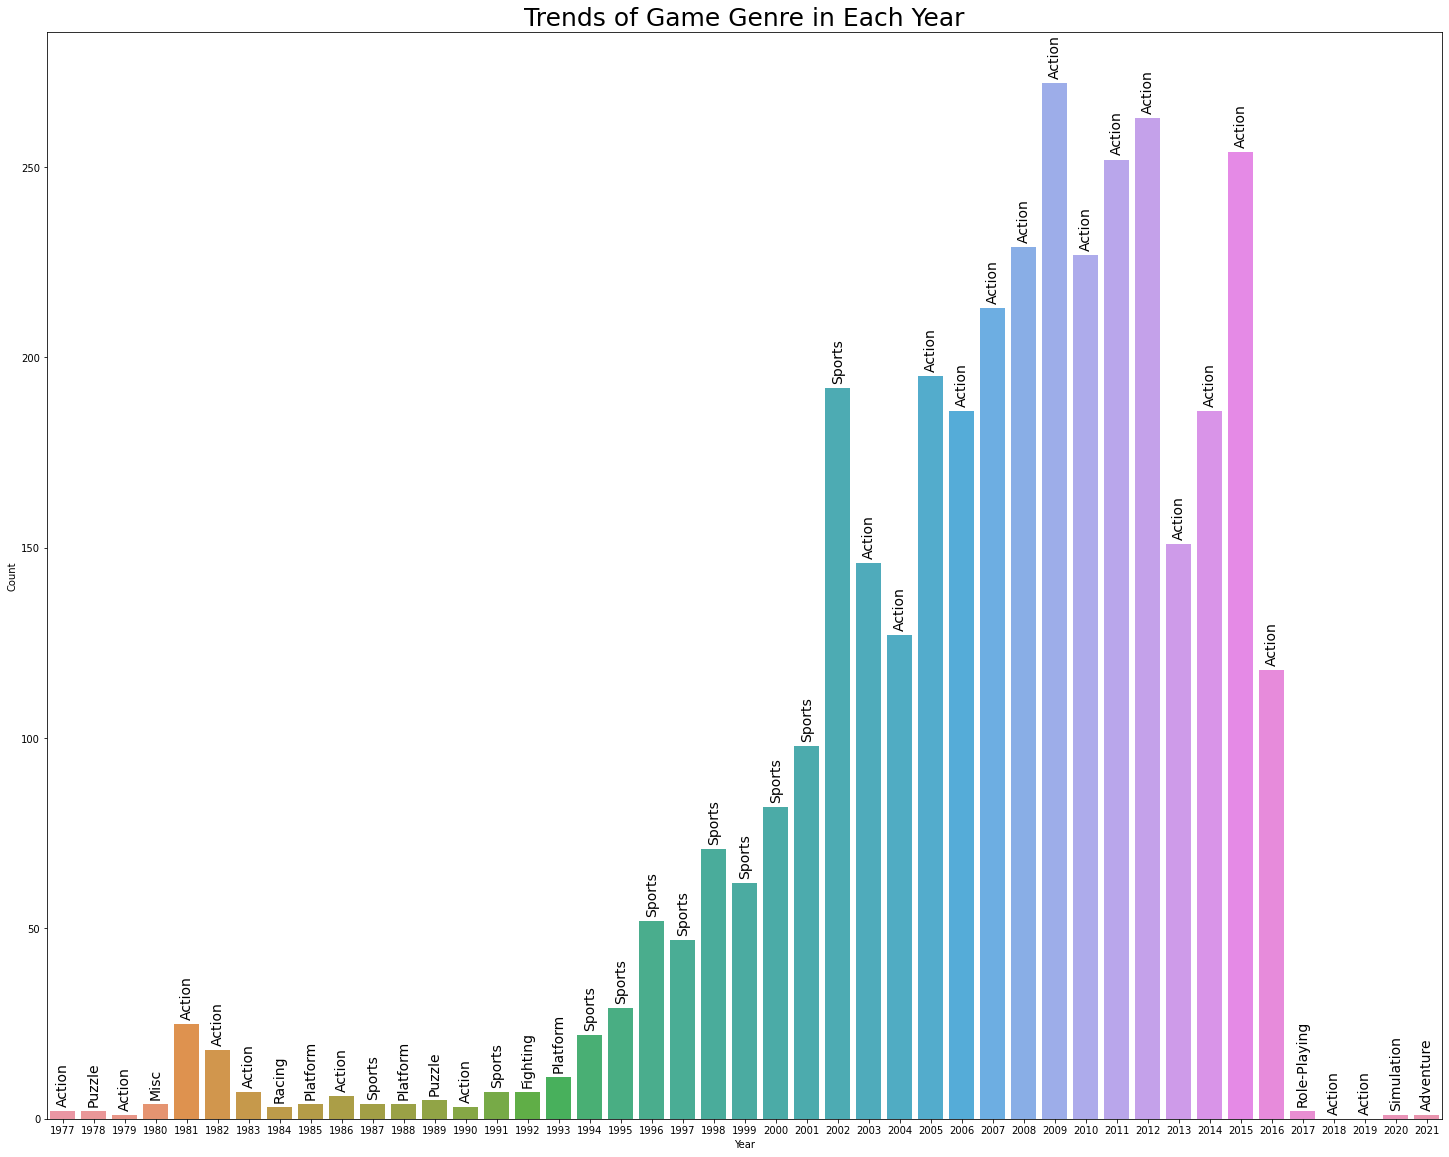

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
ax = sns.barplot(x=year_genre_max['Year'],y=year_genre_max['Count'])
idx=0
for patch in ax.patches:
    ax.text(x=patch.get_x() + patch.get_width()/2, y=patch.get_height() + 2, s=year_genre_max.loc[idx,'Genre'], size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('Trends of Game Genre in Each Year',fontsize = 25)

In [ ]:
year_genre_max['Genre'].value_counts()

Action          23
Sports          11
Platform         3
Puzzle           2
Misc             1
Racing           1
Fighting         1
Role-Playing     1
Simulation       1
Adventure        1
Name: Genre, dtype: int64

예상했던 대로 액션 장르가 연도별 최대 판매량을 차지했던 경우가 많았다. 반대로 예상 외 였던 것은 슈터 장르의 판매량이 일본을 제외한 국가에서 3위의 판매량을 냈음에도 불구하고 한 번도 발매 타이틀 수는 최댓값을 달성하지 못했다는 점이다. 이로 미루어 볼 때 슈팅 게임은 발매되는 타이틀의 갯수는 많지 않더라도 높은 판매량을 자랑한다는 것을 알 수 있다. 그 뜻은 특정 게임들이 출고량의 대부분을 담당한다는 것과 같은 의미이기도 할 것이다.

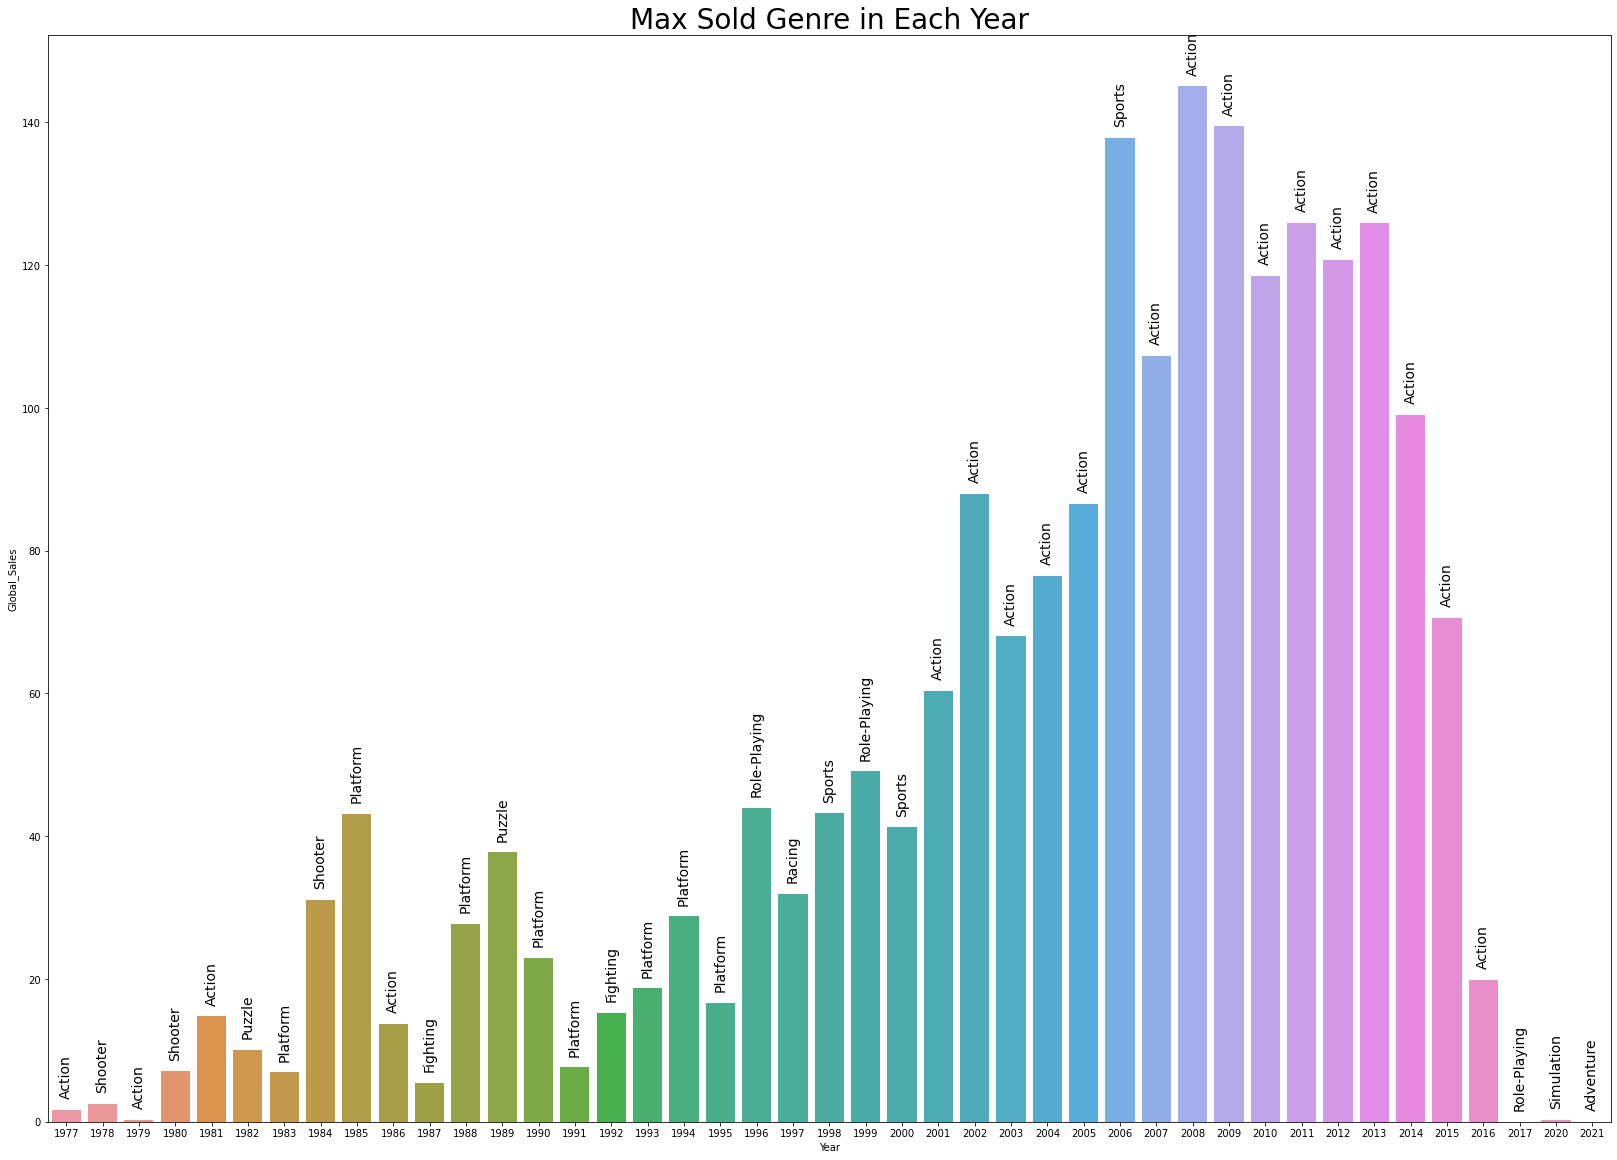

In [ ]:
year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['Year', 'Genre', 'Global_Sales']

genre = year_max_sales['Genre'].values

plt.figure(figsize=(28,20))
ax = sns.barplot(x='Year', y='Global_Sales', data=year_max_sales)
idx = 0
for value in year_max_sales['Global_Sales']:
    ax.text(x=idx, y=value + 2, s=genre[idx], size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('Max Sold Genre in Each Year', fontsize=28)
plt.show();

In [ ]:
sport_2006 = df[(df['Year'] == 2006) & (df['Genre'] == 'Sports')]
sport_2006.loc[sport_2006['Global_Sales'].idxmax(),:]

Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 2898, dtype: object

판매량을 기준으로도 정리해봤지만 액션과 스포츠 장르의 판매량이 대부분 높은 것으로 보인다. 

눈여겨 볼만한 점은 2006년에 스포츠 장르의 판매량이 상당히 높다는 점인데, 2006년 당시 스포츠 장르 최대 판매량을 달성한 타이틀은 '위 스포츠' 이며 글로벌 판매량이 82.74M으로 상당히 높은 것을 알 수 있다. 

당시 닌텐도 사의 마케팅 전략은 가정에서 모션 인식이 되는 컨트롤러로 피트니스와 게임을 온 가족이 즐길 수 있다는 신선함을 내세웠고 해당 전략이 잘 먹혔던 것으로 기억한다. 

위 타이틀과 함께 2006년은 동계 올림픽 및 월드컵이 진행되었기 때문에 스포츠 장르의 판매량이 높았던 것으로 예측할 수 있다.

2000년도 이전에는 플랫포머나 퍼즐 등의 장르가 높은 판매량을 보이지만 2000년 이후로는 거의 대부분이 액션 장르가 높은 판매량을 보임을 알 수 있는데 이는 하드웨어 및 소프트웨어의 발전으로 상대적으로 사양을 많이 타는 장르인 액션 장르가 강세를 보일 수 있는 환경이 구성되었기 때문으로 짐작된다.

위의 데이터들로 미루어 볼 때 다음 분기 신작 게임은 액션 장르의 게임을 만드는 것이 유리할 것으로 생각된다.